Assignment 5 by Group 3: Zizhao Wang, Chuanting Zong, Xinyu Zou

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# 1. Load the Lending Club Dataset
## Load the dataset into a data frame named loans.

In [2]:
loans = pd.read_csv("lending-club-data.csv", index_col = 0)
loans

C:\Users\Admin\AppData\Local\Temp\ipykernel_18832\577060481.py:1: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv("lending-club-data.csv", index_col = 0)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,NaN,...,0.4,1.0,1.0,1.0,0,8.143500,20141201T000000,1,1,1
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,...,0.8,1.0,1.0,1.0,1,2.393200,20161201T000000,1,1,1
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,NaN,...,1.0,1.0,1.0,1.0,0,8.259550,20141201T000000,1,1,1
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.2,1.0,1.0,1.0,0,8.275850,20141201T000000,0,1,1
1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,0.8,1.0,1.0,1.0,0,5.215330,20141201T000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856168,11708132,6000,6000,6000,60 months,23.40,170.53,E,E5,NaN,...,1.0,0.0,1.0,1.0,1,4.487630,20190101T000000,0,1,0
9795013,11647121,15250,15250,15250,36 months,17.57,548.05,D,D2,Installer,...,0.4,0.0,0.0,1.0,0,10.117800,20170101T000000,0,0,0
9695736,11547808,8525,8525,8525,60 months,18.25,217.65,D,D3,MANAGER,...,0.6,0.0,1.0,1.0,0,6.958120,20190101T000000,0,1,0


# 2. Exploring Features
## Let's quickly explore what the dataset looks like. First, print out the column names to see what features we have in this dataset. Here, we should see that we have some feature columns that have to do with grade of the loan, annual income, home ownership status, etc.

In [3]:
loans.columns.values

array(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'bad_loans', 'emp_length_num', 'grade_num', 'sub_gr

# 3. Features for the classification algorithm
## In this assignment, we will be using a subset of features (categorical and numeric). The features we will be using are described below. Extract these feature columns and target columns from the dataset. We will only use these features.
features = ['grade', # grade of the loan
'sub_grade', # sub-grade of the loan
'short_emp', # one year or less of employment
'emp_length_num', # number of years of employment
'home_ownership', # home_ownership status: own, mortgage or rent
'dti', # debt to income ratio
'purpose', # the purpose of the loan
'term', # the term of the loan
'last_delinq_none', # has borrower had a delinquincy
'last_major_derog_none', # has borrower had 90 day or worse rating
'revol_util', # percent of available credit being used
'total_rec_late_fee', # total late fees received to day
]
## You may skip observations with missing values in these features.

In [4]:
features = ['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none', 'revol_util', 'total_rec_late_fee']
loans_features = loans[features]
loans_features.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
id,,,,,,,,,,,,
1077501,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00
1077430,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00
1077175,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00
1076863,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97
1075269,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00


In [5]:
loans_df = loans_features.join(loans['bad_loans'])

In [6]:
loans_df.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
id,,,,,,,,,,,,,
1077501,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,0
1077430,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00,1
1077175,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,0
1076863,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,0
1075269,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,0


# 4. Exploring the Target Column
## The target column (label column) of the dataset that we are interested in is called bad_loans. In this column 1 means a risky (bad) loan 0 means a safe loan.
## Now, let us explore the distribution of the target column. This gives us a sense of how many safe and risky loans are present in the dataset. Print out the percentage of safe loans and risky loans in the data frame.
## It looks like most of these loans are safe loans (thankfully). But this does make our problem of identifying risky loans challenging.

In [7]:
target = ['bad_loans']
loans_target = loans_df[target]
loans_target.head()

,bad_loans
id,
1077501,0
1077430,1
1077175,0
1076863,0
1075269,0


In [8]:
counts0 = loans_target.value_counts()[0]
counts1 = loans_target.value_counts()[1]
print(counts0)
print(counts1)

99457
23150


In [9]:
length = len(loans_target)

In [10]:
percentage0 = counts0/length * 100
percentage1 = counts1/length * 100
print('percentage of safe is {:.2f}%'.format(percentage0))
print('percentage of risky is {:.2f}%'.format(percentage1))

percentage of safe is 81.12%
percentage of risky is 18.88%


# 5. Sample Data to Balance Classes
## Our data is disproportionally full of safe loans. Let's create two datasets: one with just the safe loans (safe_loans_raw) and one with just the risky loans (risky_loans_raw).
## One way to combat class imbalance is to undersample the larger class until the class distribution is approximately half and half. Here, we will undersample the larger class (safe loans) in order to balance out our dataset. This means we are throwing away many data points. We will use seed=1 so everyone gets the same results. Use the following codes for this task.
### #Since there are fewer risky loans than safe loans, find the ratio of the sizes and use that percentage to undersample the safe loans.
#### percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
#### risky_loans = risky_loans_raw
#### safe_loans = safe_loans_raw.sample(frac = percentage, random_state = 1)
### # Append the risky_loans with the downsampled version of safe_loans
#### loans_data = risky_loans.append(safe_loans)
## You can verify now that loans_data is comprised of approximately 50% safe loans and 50% risky loans.

In [11]:
risky_loans_raw = loans_df[loans_df['bad_loans'] == 1].copy()
safe_loans_raw = loans_df[loans_df['bad_loans'] == 0].copy()

In [12]:
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(frac = percentage, random_state = 1)
loans_data = risky_loans.append(safe_loans)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18832\1694688783.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loans_data = risky_loans.append(safe_loans)


In [13]:
loans_data.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
id,,,,,,,,,,,,,
1077430,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,1
1071795,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,1
1071570,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,1
1064687,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,1
1069057,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,1


In [14]:
loans_data['bad_loans'].value_counts()

1    23150
0    23150
Name: bad_loans, dtype: int64

# 6. One-Hot Encoding
## For scikit-learn's implementation, it requires numerical values for its data matrix. This means you will have to turn categorical variables into binary features via one-hot encoding.

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# 7. Split Data into Training and Validation and Test Sets
## First, split the original data into train-validate set (90%) and test set (10%) using random state = 0.
## Then, split the train-validate set into training set (80%) and validation set (20%) using random state = 0.

In [25]:
y = loans_data['bad_loans']
X = loans_data.drop(columns = 'bad_loans')

In [26]:
X.isna().sum()

grade                    0
sub_grade                0
short_emp                0
emp_length_num           0
home_ownership           0
dti                      0
purpose                  0
term                     0
last_delinq_none         0
last_major_derog_none    0
revol_util               0
total_rec_late_fee       0
dtype: int64

In [27]:
y.isna().sum()

0

In [28]:
X

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
id,,,,,,,,,,,,
1077430,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0
1071795,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0
1071570,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0
1064687,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0
1069057,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
808056,A,A4,0,4,MORTGAGE,21.36,debt_consolidation,36 months,1,1,16.5,0.0
5790590,B,B1,0,8,MORTGAGE,16.29,debt_consolidation,36 months,1,1,41.0,0.0
1431918,B,B1,0,9,RENT,14.40,debt_consolidation,36 months,1,1,36.3,0.0


In [29]:
X = encoder.fit_transform(X)
X.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.1, random_state=0)

In [31]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state=0)

# 8. Build a Decision Tree Classifier
## Build a decision tree classifier with max_depth = 2 or 6 or 10 using the training set.
## Visualize your decision trees.
## Compare the accuracy of the three decision tree classifiers using the validation set. Which one is the best? Report the best model’s performance on the test set.


In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
tree2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

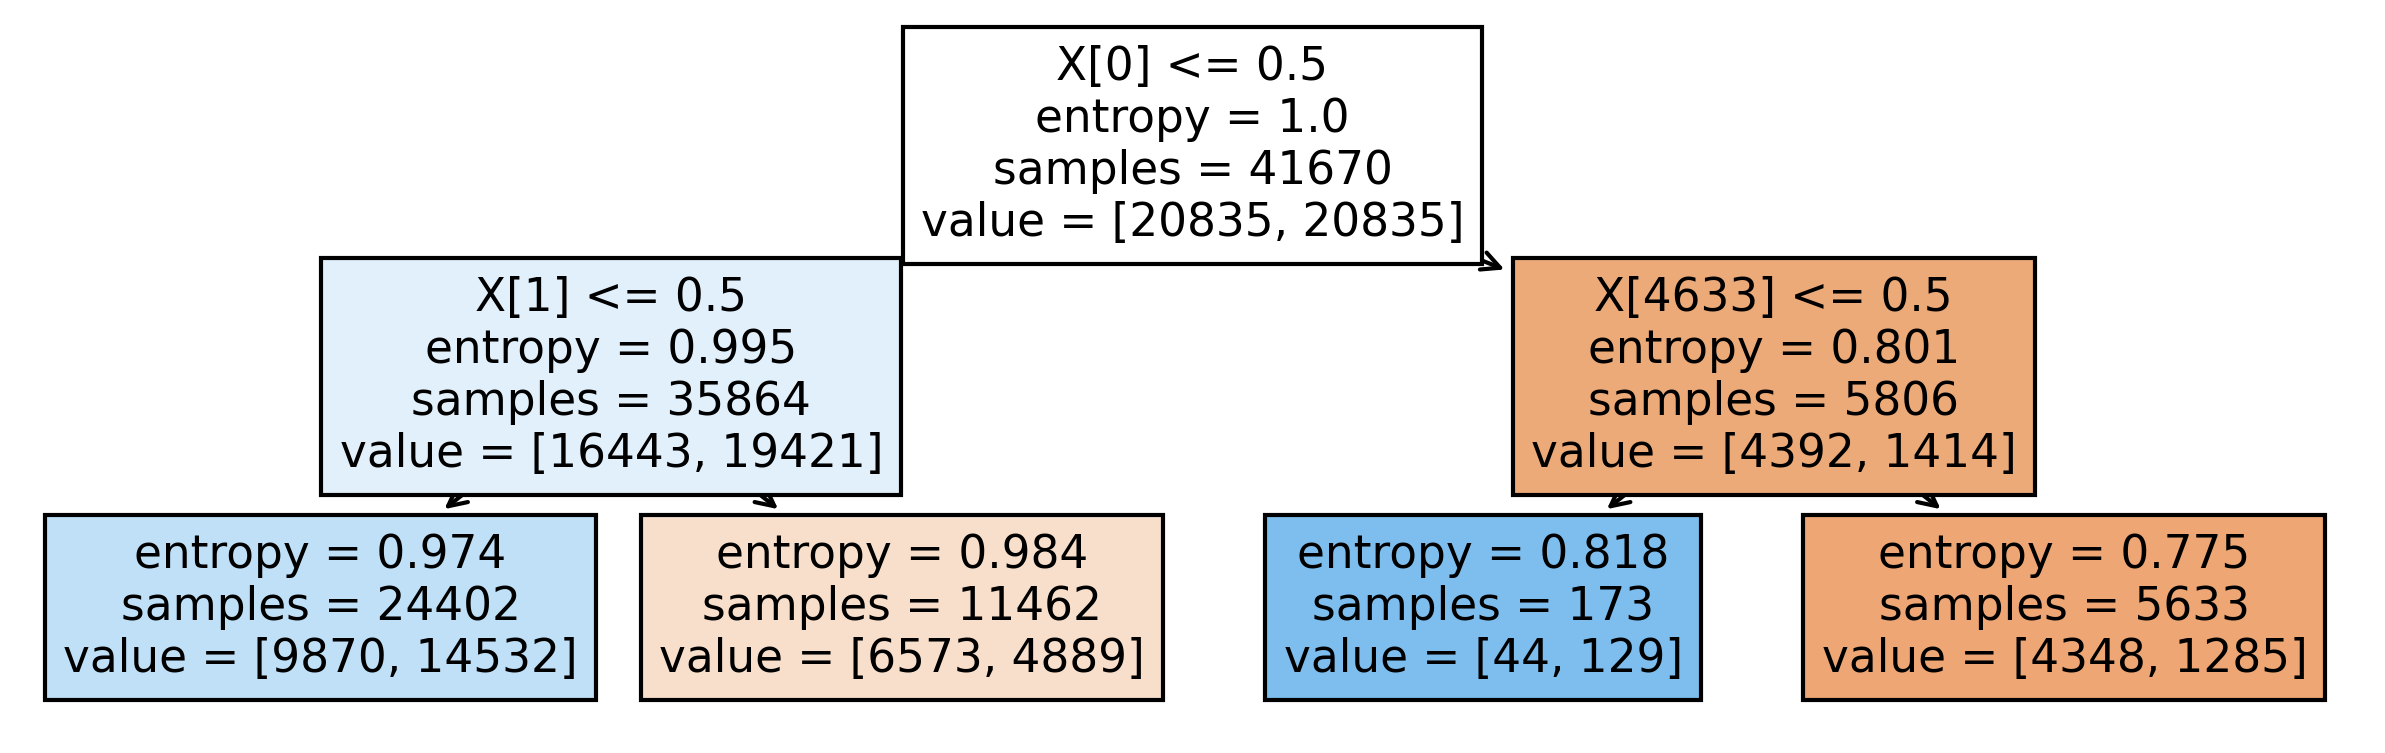

In [33]:
plt.figure(figsize=(10, 3), dpi=300)
tree_dot2 = plot_tree(tree2, filled=True)

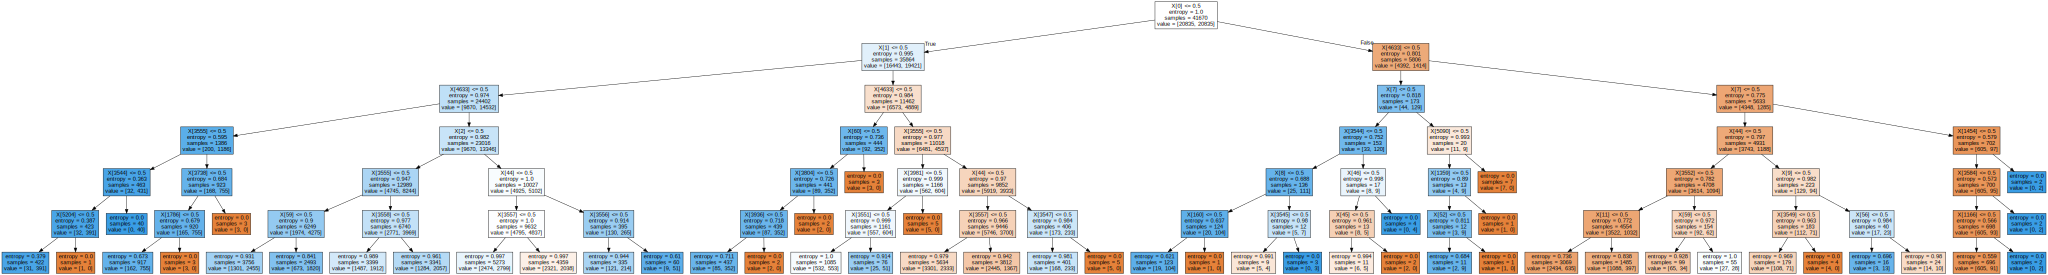

In [35]:
import graphviz
tree6 = DecisionTreeClassifier(max_depth=6, criterion='entropy')
tree6.fit(X_train, y_train)
tree_dot6 = export_graphviz(tree6, out_file=None, filled=True)
graph6 = graphviz.Source(tree_dot6, format='png')
graph6

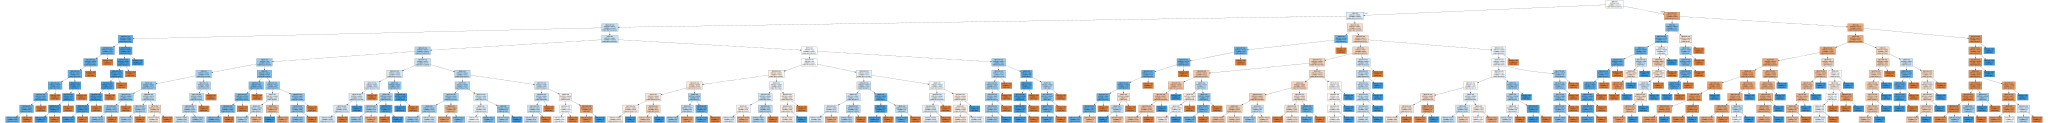

In [36]:
tree10 = DecisionTreeClassifier(max_depth=10, criterion='entropy')
tree10.fit(X_train, y_train)
tree_dot10 = export_graphviz(tree10, out_file=None, filled=True)
graph10 = graphviz.Source(tree_dot10, format='png')
graph10

In [37]:
tree2.feature_importances_

array([0.62777193, 0.30431598, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [38]:
tree6.feature_importances_

array([0.38560159, 0.18692255, 0.0766517 , ..., 0.        , 0.        ,
       0.        ])

In [39]:
tree10.feature_importances_

array([0.30543405, 0.14806088, 0.06071562, ..., 0.        , 0.        ,
       0.        ])

In [40]:
from sklearn.metrics import accuracy_score
y2_pred_val = tree2.predict(X_train_val)
acc2 = accuracy_score(y_train_val, y2_pred_val)
print('when max_depth is 2, accuracy is', acc2)

when max_depth is 2, accuracy is 0.615280777537797


In [41]:
y6_pred_val = tree6.predict(X_train_val)
acc6 = accuracy_score(y_train_val, y6_pred_val)
print('when max_depth is 6, accuracy is', acc6)

when max_depth is 6, accuracy is 0.6330693544516439


In [42]:
y10_pred_val = tree10.predict(X_train_val)
acc10 = accuracy_score(y_train_val, y10_pred_val)
print('when max_depth is 10, accuracy is', acc10)

when max_depth is 10, accuracy is 0.6471682265418767


In [43]:
best_model = tree10
y_pred_best = best_model.predict(x_test)
acc_best = accuracy_score(y_test, y_pred_best)
print('The best model is when max_depth is 10, accurancy is', acc10)
print('The accuracy of test set is', acc_best)

The best model is when max_depth is 10, accurancy is 0.6471682265418767
The accuracy of test set is 0.6356371490280778


# 9. Explore Probability Predictions
## For each row in the validation set, what is the probability (using the best model from the previous comparisons) of a loan being classified as safe? (Hint: if you are using scikit-learn, you can use the .predict_proba() method)

In [44]:
probabilities = best_model.predict_proba(X_val)
probabilities_risky = probabilities[:,1]
print(probabilities_risky)

[0.36842105 0.55625393 0.18596956 ... 0.45438283 0.26137135 0.66533409]


# 10. Build a SVM Classifier
## Use 5-fold GridSearchCV on the train-validate set. Build a kernelized SVM classifier (preprocessing the data with MinMaxScaler) with rbf kernel and compare hyperparameters in the following grid:
## C: np.logspace(-3, 3, 7), gamma: np.logspace(-3, 3, 7) / X_train.shape[0]
## Report the best model’s performance on the test set.

In [68]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [69]:
# MinMaxScaler was not supported on my laptop
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
param_grid = {'C': np.logspace(-3, 3, 7),
               'gamma': np.logspace(-3, 3, 7)/X_train_scaled.shape[0]}
param_grid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'gamma': array([2.39980802e-08, 2.39980802e-07, 2.39980802e-06, 2.39980802e-05,
        2.39980802e-04, 2.39980802e-03, 2.39980802e-02])}

In [71]:
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 3, 7) / X_train_scaled.shape[0]
}

In [72]:
svm_clf = SVC(kernel='rbf')

In [74]:
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

In [ ]:
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

In [ ]:
best_model = SVC(kernel='rbf', C=best_C, gamma=best_gamma)

In [ ]:
best_model.fit(X_train_scaled, y_train)

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
best_model.fit(X_scaled, y)

In [ ]:
X_test_scaled = scaler.transform(x_test)

In [ ]:
y_test_pred = best_model.predict(X_test_scaled)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("kernelized SVM classifier:", accuracy_test)

# 11. Build a Random Forest Classifier
## Use 5-fold GridSearchCV on the train-validate set. Build a random forest classifier and compare hyperparameters in the following grid:
### max_features: [2, 4, 6, 8, 10], max_depth: [6, 8, 10, 12, 14]
## Report the best model’s performance on the test set.

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
param_grid2 = {'max_features': [2,4,6,8,10],
                'max_depth':[6,8,10,12,14]}
rf_classifier= RandomForestClassifier(random_state=42)
grid2 = GridSearchCV(rf_classifier, param_grid = param_grid2, cv=5, n_jobs = -1)

In [52]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'max_features': [2, 4, 6, 8, 10]})

In [53]:
best_max_features = grid2.best_params_['max_features']
best_max_depth = grid2.best_params_['max_depth']
best_model = RandomForestClassifier(max_features=best_max_features, max_depth=best_max_depth, random_state=42)

In [54]:
best_model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=8, random_state=0)

In [55]:
y_test_pred2 = best_model2.predict(x_test)
acc_test2 = accuracy_score(y_test, y_test_pred2)
print('Random Forest:', acc_test2)

Random Forest: 0.6136069114470842


# 12. Build a Gradient Booster Classifier
## Use 5-fold GridSearchCV on the train-validate set. Build a gradient boosted tree classifier (fixing max_depth = 6) and compare hyperparameters in the following grid:
## learning_rate: np.logspace(-2, 0, 3), n_estimators: [5, 10, 50, 100, 200, 500]
## Report the best model’s performance on the test set.

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid3 = {'learning_rate': np.logspace(-2, 0, 3),
                'n_estimators': [5, 10, 50, 100, 200, 500]}
gb_classifier = GradientBoostingClassifier(max_depth=6)
grid3 = GridSearchCV(gb_classifier, param_grid = param_grid3, cv=5, n_jobs=-1)

In [57]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(max_depth=6), n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.1 , 1.  ]),
                         'n_estimators': [5, 10, 50, 100, 200, 500]})

In [58]:
best_learning_rate = grid3.best_params_['learning_rate']
best_n_estimators = grid3.best_params_['n_estimators']
best_model3 = GradientBoostingClassifier(learning_rate = best_learning_rate, n_estimators = best_n_estimators, random_state = 0)

In [59]:
best_model3.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=0)

In [60]:
y_test_pred3 = best_model3.predict(x_test)
acc_test3 = accuracy_score(y_test, y_test_pred2)
print('Gradient Booster Classifier:', acc_test2)

Gradient Booster Classifier: 0.6136069114470842


# 13. XGBoost, LightGBM, and CatBoost
## Try XGBoost, LightGBM, and CatBoost and see if you can get further improvement.
## Report the best model’s performance on the test set.

In [61]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("accuracy on test set: %f" % xgb.score(x_test, y_test))

accuracy on test set: 0.644276


In [64]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print("accuracy on test set: %f" % lgbm.score(x_test, y_test))

accuracy on test set: 0.640173


In [66]:
conda install -c conda-forge catboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [67]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
print("accuracy on test set: %f" % catb.score(x_test, y_test))

Learning rate set to 0.050652
0:	learn: 0.6877168	total: 160ms	remaining: 2m 39s
1:	learn: 0.6828360	total: 180ms	remaining: 1m 29s
2:	learn: 0.6785170	total: 200ms	remaining: 1m 6s
3:	learn: 0.6745468	total: 228ms	remaining: 56.9s
4:	learn: 0.6710032	total: 248ms	remaining: 49.5s
5:	learn: 0.6680461	total: 268ms	remaining: 44.4s
6:	learn: 0.6651648	total: 288ms	remaining: 40.8s
7:	learn: 0.6624239	total: 309ms	remaining: 38.3s
8:	learn: 0.6602416	total: 328ms	remaining: 36.2s
9:	learn: 0.6580741	total: 348ms	remaining: 34.5s
10:	learn: 0.6563260	total: 369ms	remaining: 33.2s
11:	learn: 0.6548288	total: 390ms	remaining: 32.1s
12:	learn: 0.6532239	total: 410ms	remaining: 31.1s
13:	learn: 0.6518327	total: 430ms	remaining: 30.3s
14:	learn: 0.6506587	total: 450ms	remaining: 29.5s
15:	learn: 0.6493852	total: 470ms	remaining: 28.9s
16:	learn: 0.6483032	total: 490ms	remaining: 28.3s
17:	learn: 0.6472750	total: 510ms	remaining: 27.8s
18:	learn: 0.6465278	total: 529ms	remaining: 27.3s
19:	learn

165:	learn: 0.6287682	total: 3.6s	remaining: 18.1s
166:	learn: 0.6287174	total: 3.62s	remaining: 18.1s
167:	learn: 0.6286835	total: 3.64s	remaining: 18s
168:	learn: 0.6286528	total: 3.66s	remaining: 18s
169:	learn: 0.6285801	total: 3.68s	remaining: 18s
170:	learn: 0.6285584	total: 3.7s	remaining: 17.9s
171:	learn: 0.6285298	total: 3.72s	remaining: 17.9s
172:	learn: 0.6284828	total: 3.74s	remaining: 17.9s
173:	learn: 0.6284370	total: 3.76s	remaining: 17.9s
174:	learn: 0.6284164	total: 3.78s	remaining: 17.8s
175:	learn: 0.6283655	total: 3.81s	remaining: 17.8s
176:	learn: 0.6283308	total: 3.83s	remaining: 17.8s
177:	learn: 0.6283010	total: 3.85s	remaining: 17.8s
178:	learn: 0.6282661	total: 3.87s	remaining: 17.7s
179:	learn: 0.6282174	total: 3.89s	remaining: 17.7s
180:	learn: 0.6281925	total: 3.91s	remaining: 17.7s
181:	learn: 0.6281486	total: 3.93s	remaining: 17.7s
182:	learn: 0.6281209	total: 3.95s	remaining: 17.6s
183:	learn: 0.6280602	total: 3.97s	remaining: 17.6s
184:	learn: 0.628010

333:	learn: 0.6215314	total: 7.03s	remaining: 14s
334:	learn: 0.6214733	total: 7.05s	remaining: 14s
335:	learn: 0.6214123	total: 7.07s	remaining: 14s
336:	learn: 0.6213881	total: 7.08s	remaining: 13.9s
337:	learn: 0.6213592	total: 7.1s	remaining: 13.9s
338:	learn: 0.6213228	total: 7.12s	remaining: 13.9s
339:	learn: 0.6212842	total: 7.14s	remaining: 13.9s
340:	learn: 0.6212363	total: 7.16s	remaining: 13.8s
341:	learn: 0.6212074	total: 7.18s	remaining: 13.8s
342:	learn: 0.6211831	total: 7.2s	remaining: 13.8s
343:	learn: 0.6211536	total: 7.22s	remaining: 13.8s
344:	learn: 0.6211050	total: 7.25s	remaining: 13.8s
345:	learn: 0.6210616	total: 7.27s	remaining: 13.7s
346:	learn: 0.6210124	total: 7.29s	remaining: 13.7s
347:	learn: 0.6209710	total: 7.31s	remaining: 13.7s
348:	learn: 0.6209386	total: 7.33s	remaining: 13.7s
349:	learn: 0.6208792	total: 7.34s	remaining: 13.6s
350:	learn: 0.6208263	total: 7.36s	remaining: 13.6s
351:	learn: 0.6207851	total: 7.38s	remaining: 13.6s
352:	learn: 0.620750

494:	learn: 0.6153098	total: 10.3s	remaining: 10.5s
495:	learn: 0.6152649	total: 10.3s	remaining: 10.4s
496:	learn: 0.6152200	total: 10.3s	remaining: 10.4s
497:	learn: 0.6151826	total: 10.3s	remaining: 10.4s
498:	learn: 0.6151338	total: 10.3s	remaining: 10.4s
499:	learn: 0.6150954	total: 10.4s	remaining: 10.4s
500:	learn: 0.6150500	total: 10.4s	remaining: 10.3s
501:	learn: 0.6150261	total: 10.4s	remaining: 10.3s
502:	learn: 0.6149987	total: 10.4s	remaining: 10.3s
503:	learn: 0.6149740	total: 10.4s	remaining: 10.3s
504:	learn: 0.6149424	total: 10.5s	remaining: 10.2s
505:	learn: 0.6149075	total: 10.5s	remaining: 10.2s
506:	learn: 0.6148772	total: 10.5s	remaining: 10.2s
507:	learn: 0.6148505	total: 10.5s	remaining: 10.2s
508:	learn: 0.6148133	total: 10.5s	remaining: 10.2s
509:	learn: 0.6147885	total: 10.6s	remaining: 10.1s
510:	learn: 0.6147564	total: 10.6s	remaining: 10.1s
511:	learn: 0.6147182	total: 10.6s	remaining: 10.1s
512:	learn: 0.6146833	total: 10.6s	remaining: 10.1s
513:	learn: 

653:	learn: 0.6097994	total: 13.5s	remaining: 7.13s
654:	learn: 0.6097646	total: 13.5s	remaining: 7.11s
655:	learn: 0.6097123	total: 13.5s	remaining: 7.09s
656:	learn: 0.6096754	total: 13.5s	remaining: 7.07s
657:	learn: 0.6096264	total: 13.6s	remaining: 7.05s
658:	learn: 0.6096001	total: 13.6s	remaining: 7.03s
659:	learn: 0.6095699	total: 13.6s	remaining: 7s
660:	learn: 0.6095265	total: 13.6s	remaining: 6.99s
661:	learn: 0.6095035	total: 13.6s	remaining: 6.96s
662:	learn: 0.6094685	total: 13.7s	remaining: 6.94s
663:	learn: 0.6094296	total: 13.7s	remaining: 6.92s
664:	learn: 0.6094080	total: 13.7s	remaining: 6.9s
665:	learn: 0.6093875	total: 13.7s	remaining: 6.88s
666:	learn: 0.6093728	total: 13.7s	remaining: 6.86s
667:	learn: 0.6093492	total: 13.8s	remaining: 6.84s
668:	learn: 0.6093215	total: 13.8s	remaining: 6.82s
669:	learn: 0.6092820	total: 13.8s	remaining: 6.8s
670:	learn: 0.6092510	total: 13.8s	remaining: 6.78s
671:	learn: 0.6092217	total: 13.8s	remaining: 6.76s
672:	learn: 0.609

820:	learn: 0.6046661	total: 16.9s	remaining: 3.68s
821:	learn: 0.6046236	total: 16.9s	remaining: 3.66s
822:	learn: 0.6046056	total: 16.9s	remaining: 3.64s
823:	learn: 0.6045731	total: 16.9s	remaining: 3.62s
824:	learn: 0.6045229	total: 17s	remaining: 3.6s
825:	learn: 0.6044738	total: 17s	remaining: 3.58s
826:	learn: 0.6044329	total: 17s	remaining: 3.56s
827:	learn: 0.6044125	total: 17s	remaining: 3.54s
828:	learn: 0.6043785	total: 17.1s	remaining: 3.52s
829:	learn: 0.6043321	total: 17.1s	remaining: 3.5s
830:	learn: 0.6043069	total: 17.1s	remaining: 3.48s
831:	learn: 0.6042798	total: 17.1s	remaining: 3.46s
832:	learn: 0.6042476	total: 17.1s	remaining: 3.44s
833:	learn: 0.6042050	total: 17.2s	remaining: 3.41s
834:	learn: 0.6041772	total: 17.2s	remaining: 3.39s
835:	learn: 0.6041234	total: 17.2s	remaining: 3.37s
836:	learn: 0.6040797	total: 17.2s	remaining: 3.35s
837:	learn: 0.6040507	total: 17.2s	remaining: 3.33s
838:	learn: 0.6040361	total: 17.3s	remaining: 3.31s
839:	learn: 0.6039903	

988:	learn: 0.5995396	total: 20.3s	remaining: 226ms
989:	learn: 0.5995211	total: 20.3s	remaining: 205ms
990:	learn: 0.5994874	total: 20.3s	remaining: 185ms
991:	learn: 0.5994494	total: 20.4s	remaining: 164ms
992:	learn: 0.5994112	total: 20.4s	remaining: 144ms
993:	learn: 0.5993628	total: 20.4s	remaining: 123ms
994:	learn: 0.5993373	total: 20.4s	remaining: 103ms
995:	learn: 0.5993064	total: 20.5s	remaining: 82.1ms
996:	learn: 0.5992781	total: 20.5s	remaining: 61.6ms
997:	learn: 0.5992368	total: 20.5s	remaining: 41.1ms
998:	learn: 0.5992096	total: 20.5s	remaining: 20.5ms
999:	learn: 0.5991855	total: 20.5s	remaining: 0us
accuracy on test set: 0.650324


In [ ]:
#accuracy on test set: 0.650324

# 14. Final Evaluation
## After all the comparison, which model will you select?



Among all the models, XGBoost, LightGBM, and CatBoost are significantly faster than the other models, epecially SVM classifier which we won't able to get a result from Jupyter Notebook after running it form more than an hour. The model with the best accuracy score is Catboost. Therefore, we will select Catboost, which is both accurate and efficient.